<a href="https://colab.research.google.com/github/BashayerAB/Arabic-OCR-Hussein/blob/master/RNN_EffNet_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hijaa is a dataset for handwritten Arabic letters collected from Arabic-speaking schoolchildren between the ages of 7 and 12. Data were collected in Riyadh, Saudi Arabia, from January to April, 2019. It represents a total of 47,434 characters written by 591 participants in different forms.

The dataset is organized into 29 folders, each corresponding to an Arabic letter, with one folder for “hamza”. Each folder contains subfolders of the various letter forms for each letter. Each subfolder contains the images for that particular letter form. Vocalization diacritics that mark vowels and other sounds that cannot be represented by Arabic letters (harakat) are not included in our dataset.

In [1]:
import torch
import requests
import zipfile
import os
import shutil
import random
import pathlib
import pandas as pd
import numpy as np
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils
from pathlib import Path
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch.optim as optim
from tqdm.auto import tqdm
# Lets check Pytorch version
#torch.__version__

In [2]:
# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4356, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 4356 (delta 154), reused 119 (delta 119), pack-reused 4171 (from 3)
Receiving objects: 100% (4356/4356), 654.37 MiB | 17.25 MiB/s, done.
Resolving deltas: 100% (2583/2583), done.
Updating files: 100% (248/248), done.


In [3]:
!git clone https://github.com/daadturki1/Dhad.git

Cloning into 'Dhad'...
remote: Enumerating objects: 56170, done.
remote: Counting objects: 100% (9930/9930), done.
remote: Compressing objects: 100% (9918/9918), done.
remote: Total 56170 (delta 9), reused 9930 (delta 9), pack-reused 46240 (from 1)
Receiving objects: 100% (56170/56170), 48.66 MiB | 16.18 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (56075/56075), done.


In [4]:
!git clone https://github.com/HusseinYoussef/Arabic-OCR.git

Cloning into 'Arabic-OCR'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 272 (delta 130), reused 245 (delta 121), pack-reused 7 (from 1)
Receiving objects: 100% (272/272), 13.04 MiB | 11.45 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [5]:
cd Arabic-OCR/src

/content/Arabic-OCR/src


In [6]:
!pip install -r /content/Arabic-OCR/requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 MB 25.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!git clone https://github.com/HusseinYoussef/Arabic-OCR.git

Cloning into 'Arabic-OCR'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 272 (delta 130), reused 245 (delta 121), pack-reused 7 (from 1)
Receiving objects: 100% (272/272), 13.04 MiB | 18.35 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [ ]:
cd Arabic-OCR/src

/content/Arabic-OCR/src


In [ ]:
!pip install -r /content/Arabic-OCR/requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 MB 17.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!git clone https://github.com/HusseinYoussef/Arabic-OCR.git

Cloning into 'Arabic-OCR'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 272 (delta 130), reused 245 (delta 121), pack-reused 7 (from 1)
Receiving objects: 100% (272/272), 13.04 MiB | 18.35 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [ ]:
cd Arabic-OCR/src

/content/Arabic-OCR/src


In [ ]:
!pip install -r /content/Arabic-OCR/requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 MB 17.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
# Define dataset paths (replace with actual paths)
data_dir = "/content/Dhad/Dhad_Dataset"  # Replace with your dataset directory
train_dir = data_dir + "/train"
test_dir = data_dir + "/test"
val_dir = data_dir + "/validation"  # Adjust if validation folder name is different

# Data transformations (adjust based on your dataset requirements)
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),  # Adjust image size as needed
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Adjust normalization if needed
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),  # Adjust image size as needed (may differ from training)
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Same normalization as training
    ]),
    'val': transforms.Compose([  # Add validation transforms if needed
        transforms.Resize(256),  # Adjust image size as needed
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Same normalization as training
    ])
}

# Load datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'test', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}  # Adjust batch size, shuffle, and num_workers as needed
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test', 'val']}
class_names = image_datasets['train'].classes  # Assuming class labels are in the training folder

# Accessing image count per folder (assuming you have the paths defined correctly)
train_count = len(image_datasets['train'])
test_count = len(image_datasets['test'])
val_count = len(image_datasets['val'])  # Adjust if validation folder name is different

print(f"Train images: {train_count}")
print(f"Test images: {test_count}")
print(f"Validation images: {val_count}")  # Adjust if validation folder name is different


Train images: 25545
Test images: 10333
Validation images: 10310


In [ ]:
dataset_path = "https://github.com/daadturki1/Dhad/tree/main/Dhad_Dataset"

In [ ]:
dataset_path = "Dhad/Dhad_Dataset"  # Path to the dataset folder within the cloned repository
train_path = dataset_path + "/train"
test_path = dataset_path + "/test"
val_path = dataset_path + "/val"

In [ ]:
target_directory = "/content/Dhad/Dhad_Dataset/train"
print(f"Target dir: {target_directory}")

# Get the class names from the target directory and discard the first index
class_names_found = sorted([entry.name for entry in os.scandir(target_directory) if entry.is_dir()])[1:]

# Count the number of images in each folder
image_counts = {}
for class_name in class_names_found:
    class_directory = os.path.join(target_directory, class_name)
    image_count = len([entry for entry in os.scandir(class_directory) if entry.is_file()])
    image_counts[class_name] = image_count

# Print the number of images in each folder
for class_name, count in image_counts.items():
    print(f"{class_name}: {count} images")

Target dir: /content/Dhad/Dhad_Dataset/train
10-raa: 538 images
11-zeyn: 566 images
12-seen: 696 images
13-sheen: 784 images
14-sad: 598 images
15-dhad: 1061 images
16-t_aa: 1155 images
17-th_aa: 1131 images
18-ayen: 1093 images
19-ghayen: 600 images
2-baa: 1109 images
20-faa: 877 images
21-ghaf: 1006 images
22-kaf: 1211 images
23-lam: 710 images
24-meem: 1173 images
25-noon: 1147 images
26-haa: 1308 images
27-waw: 523 images
28-yaa: 681 images
29-hamzah: 844 images
3-taa: 977 images
4-thaa: 1040 images
5-jeem: 972 images
6-h_aa: 1152 images
7-khaa: 660 images
8-dal: 558 images
9-thal: 549 images


In [ ]:
class GrayscaleToRGB(object):
    def __call__(self, img):
        if isinstance(img, torch.Tensor):
            img = img.squeeze().cpu().numpy()
            img = np.transpose(img, (1, 2, 0))
            img = (img - np.min(img)) / (np.max(img) - np.min(img))
            img = (255 * img).astype(np.uint8)
            img = PIL.Image.fromarray(img)

        return img.convert('RGB')

In [ ]:
transform = transforms.Compose([
    GrayscaleToRGB(),
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [ ]:
train_dataset = ImageFolder(train_path, transform=transform)
test_dataset = ImageFolder(test_path, transform=transform)
val_dataset = ImageFolder(val_path, transform=transform)

In [ ]:
train_loaderr = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loaderr = DataLoader(test_dataset, batch_size=32, shuffle=False)
val_loaderr = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
random_index = random.randint(0, len(train_dataset)-1)
image, label = train_dataset[random_index]

In [ ]:
image = image.numpy().transpose((1, 2, 0))

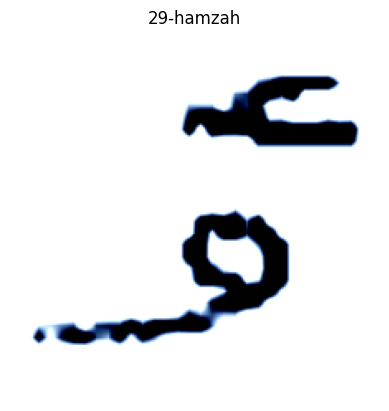

In [ ]:
class_names = train_dataset.classes
label_name = class_names[label]
plt.imshow(image)
plt.title(label_name)
plt.axis('off')
plt.show()

In [ ]:
image , label = train_dataset.__getitem__(32)

image.size()

torch.Size([3, 224, 224])

In [ ]:
#train_loader = DataLoader(train_dataset, batch_size= 64, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size= 64, shuffle=False)
#val_loader = DataLoader(val_dataset, batch_size= 64, shuffle=False)

In [ ]:
class GrayscaleToRGB(object):
    def __call__(self, img):
        return img.convert('RGB')

In [ ]:
class ImageDataset(Dataset):

    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # load image as ndarray type (Height * Width * Channels)
        # be carefull for converting dtype to np.uint8 [Unsigned integer (0 to 255)]
        # in this example, i don't use ToTensor() method of torchvision.transforms
        # so you can convert numpy ndarray shape to tensor in PyTorch (H, W, C) --> (C, H, W)
        image_array = self.data.iloc[index, self.data.columns != 'label'].values.astype(np.uint8).reshape(32,32)
        image = Image.fromarray(image_array)
        label = self.data.iloc[index, -1] - 1

        if self.transform is not None:
            image = self.transform(image)

        return image, label

/content/Dhad/Dhad_Dataset/test/7-khaa/khaa564.png
7-khaa
Random image path:/content/Dhad/Dhad_Dataset/test/7-khaa/khaa564.png
Image class: 7-khaa
Image height: 32
Image width: 32


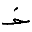

In [ ]:
import random
from PIL import Image

# Set seed
random.seed(42)
image_path_organised='/content/Dhad/Dhad_Dataset'
# 1. Get all image paths
image_path_list = list(Path(image_path_organised).glob("*/*/*.png"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path:{random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 31.5, 31.5, -0.5)

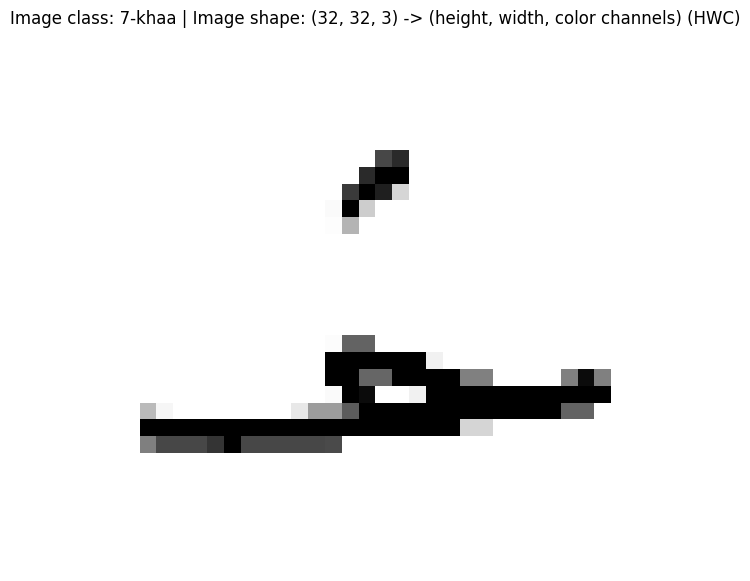

In [ ]:
# Try to visualize and image with matplotlib.

import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> (height, width, color channels) (HWC)")
plt.axis(False)

In [ ]:
data_transform = transforms.Compose([
    GrayscaleToRGB(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)),
    transforms.Resize(size=(64,64)), ## this is added in the new code
    ])


In [ ]:
# Now we can transform our random image and print out the dtype, shape and the img representation (tensor)
data_transform(img).dtype,data_transform(img).shape, data_transform(img)

(torch.float32,
 torch.Size([3, 64, 64]),
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]))

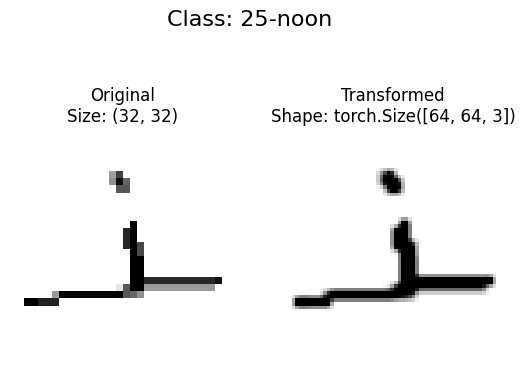

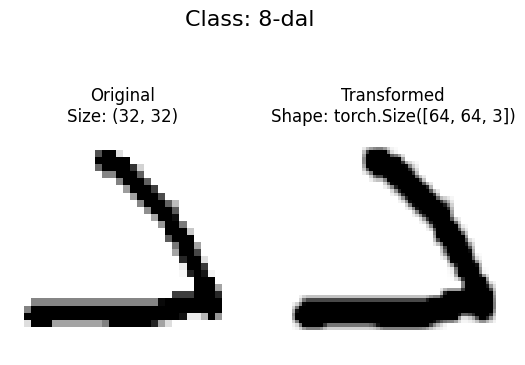

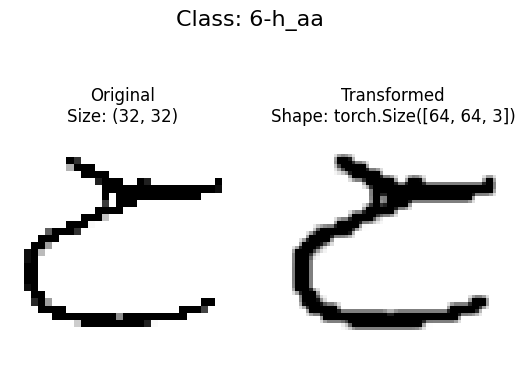

In [ ]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=28)

In [ ]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: /content/Dhad/Dhad_Dataset/train


['.DS_Store',
 '1-alif',
 '10-raa',
 '11-zeyn',
 '12-seen',
 '13-sheen',
 '14-sad',
 '15-dhad',
 '16-t_aa',
 '17-th_aa',
 '18-ayen',
 '19-ghayen',
 '2-baa',
 '20-faa',
 '21-ghaf',
 '22-kaf',
 '23-lam',
 '24-meem',
 '25-noon',
 '26-haa',
 '27-waw',
 '28-yaa',
 '29-hamzah',
 '3-taa',
 '4-thaa',
 '5-jeem',
 '6-h_aa',
 '7-khaa',
 '8-dal',
 '9-thal']

In [ ]:
import torch

def order_class_list(class_list):
    # Remove the first item ('.DS_Store') if it exists
    if class_list[0] == '.DS_Store':
        class_list = class_list[1:]

    # Extract the numbers from class names and convert them to integers
    class_numbers = [int(item.split('-')[0]) for item in class_list]

    # Sort the class names based on the extracted numbers
    ordered_class_list = [class_name for _, class_name in sorted(zip(class_numbers, class_list))]

    return ordered_class_list

# Example usage:
ordered_class_list = order_class_list(class_names_found)
print(ordered_class_list)


['1-alif', '2-baa', '3-taa', '4-thaa', '5-jeem', '6-h_aa', '7-khaa', '8-dal', '9-thal', '10-raa', '11-zeyn', '12-seen', '13-sheen', '14-sad', '15-dhad', '16-t_aa', '17-th_aa', '18-ayen', '19-ghayen', '20-faa', '21-ghaf', '22-kaf', '23-lam', '24-meem', '25-noon', '26-haa', '27-waw', '28-yaa', '29-hamzah']


In [ ]:
# Example usage:
ordered_class_list = order_class_list(class_names_found)
print(ordered_class_list)

['1-alif', '2-baa', '3-taa', '4-thaa', '5-jeem', '6-h_aa', '7-khaa', '8-dal', '9-thal', '10-raa', '11-zeyn', '12-seen', '13-sheen', '14-sad', '15-dhad', '16-t_aa', '17-th_aa', '18-ayen', '19-ghayen', '20-faa', '21-ghaf', '22-kaf', '23-lam', '24-meem', '25-noon', '26-haa', '27-waw', '28-yaa', '29-hamzah']


In [ ]:
def order_class_list_1(class_list):
    # Extract the numbers from class names and convert them to integers
    class_numbers = [int(item.split('-')[0]) for item in class_list[1:]]  # Skip the first item
    # Sort the class names based on the extracted numbers
    ordered_class_list = [class_name for _, class_name in sorted(zip(class_numbers, class_list[1:]))]  # Skip the first item
    # Add the first item back to the ordered list
    ordered_class_list.insert(0, class_list[0])
    return ordered_class_list

# Example usage:
ordered_class_list_1 = order_class_list_1(class_names_found)
print(ordered_class_list_1)


['.DS_Store', '1-alif', '2-baa', '3-taa', '4-thaa', '5-jeem', '6-h_aa', '7-khaa', '8-dal', '9-thal', '10-raa', '11-zeyn', '12-seen', '13-sheen', '14-sad', '15-dhad', '16-t_aa', '17-th_aa', '18-ayen', '19-ghayen', '20-faa', '21-ghaf', '22-kaf', '23-lam', '24-meem', '25-noon', '26-haa', '27-waw', '28-yaa', '29-hamzah']


In [ ]:
from typing import List, Dict, Tuple
import os
import re

def find_classes_with_indices(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory and assigns indices based on numerical order"""

    # 1. Get the class names by scanning the target directory
    classes = [entry.name for entry in os.scandir(directory) if entry.is_dir()]

    # 2. Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}... Please check file structure")

    # 3. Sort the class names based on numerical order
    classes.sort(key=lambda x: int(re.search(r"\d+", x).group()))

    # 4. Create a dictionary of index labels
    class_to_idx = {class_name: i for i, class_name in enumerate(classes, start=1)}  # Start index from 1

    return classes, class_to_idx

# Example usage:
target_directory = "/content/Dhad/Dhad_Dataset/train"

classes, class_to_idx = find_classes_with_indices(target_directory)

# Print the classes and their corresponding indices
for class_name, index in class_to_idx.items():
    print(f"Class: {class_name}, Index: {index}")


Class: 1-alif, Index: 1
Class: 2-baa, Index: 2
Class: 3-taa, Index: 3
Class: 4-thaa, Index: 4
Class: 5-jeem, Index: 5
Class: 6-h_aa, Index: 6
Class: 7-khaa, Index: 7
Class: 8-dal, Index: 8
Class: 9-thal, Index: 9
Class: 10-raa, Index: 10
Class: 11-zeyn, Index: 11
Class: 12-seen, Index: 12
Class: 13-sheen, Index: 13
Class: 14-sad, Index: 14
Class: 15-dhad, Index: 15
Class: 16-t_aa, Index: 16
Class: 17-th_aa, Index: 17
Class: 18-ayen, Index: 18
Class: 19-ghayen, Index: 19
Class: 20-faa, Index: 20
Class: 21-ghaf, Index: 21
Class: 22-kaf, Index: 22
Class: 23-lam, Index: 23
Class: 24-meem, Index: 24
Class: 25-noon, Index: 25
Class: 26-haa, Index: 26
Class: 27-waw, Index: 27
Class: 28-yaa, Index: 28
Class: 29-hamzah, Index: 29


In [ ]:
# 0. Write a custom dataset class
# 1. Subclass torch.utils.data.Dataset
class ArabicHCDataset(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.png"))
    # Setup transform
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes_with_indices(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # return untransformed image and label

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [8]:
!jupyter nbconvert --to script RNN_EffNet_Code.ipynb

[NbConvertApp] WARNING | pattern 'RNN_EffNet_Code.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute

In [9]:
!mv RNN_EffNet_Code.py /content/Arabic-OCR/src

mv: cannot stat 'RNN_EffNet_Code.py': No such file or directory


In [10]:
!ls


character_segmentation.py  feature_extraction.py  output	    test      utilities.py
dataset.py		   models		  preprocessing.py  train.py
edit.py			   OCR.py		  segmentation.py   truth


In [13]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [16]:
!ls

 00_pytorch_fundmintals.ipynb			 LSTM_EffNet_Code.ipynb
 Admin_LSTM_Training.ipynb			 LSTM_EffNet_EarlyStopping_Code.ipynb
 AOCR_meeting_5-9-24.pptx			 MINSTsuryaOCR.py
 AOCRtrain.ipynb				 MINSTTesting.ipynb
'Copy of functionizedEMINST.ipynb'		 paragraphGen.ipynb
'Copy of PyTorch Lightning Introduction.ipynb'	 PyResNetAHCD.ipynb
'Copy of TRAINING_A_CLASSIFIER_tutorial'	 ResNet_Dhad.ipynb
 Cor_EffNet_LSTM_Dhad.ipynb			 ResNetTraining.ipynb
 Counter_Output.ipynb				 ResNetusingAHCD.ipynb
 Counter_Project.ipynb				 RNN_EffNet_Code.ipynb
 DatasetGenerator.ipynb				 RNN_EffNet_Code.txt
 DenseNet.ipynb					 Segmentation_Code.ipynb
 DensNet_Dhad.ipynb				 SuryaOCRAHCD.ipynb
 Easy_OCR_Test.ipynb				 SuryaOCR.ipynb
 EfficientNet2.ipynb				 TinyVGGusingAHCD.ipynb
 EfficientNetAHCD.ipynb				 TinyVGGusingDhad.ipynb
 EfficientNet_Dhad.ipynb			 TRAINING_A_CLASSIFIER_tutorial.ipynb
 EfficientNet_Hijja.ipynb			 TrainingAhcd1.ipynb
 EffNet_LSTM_AOCR.ipynb				 Training_AOCR_Classifier.ipynb
 Functioniz

In [17]:
!jupyter nbconvert --to script RNN_EffNet_Code.ipynb

[NbConvertApp] Converting notebook RNN_EffNet_Code.ipynb to script
[NbConvertApp] Writing 66809 bytes to RNN_EffNet_Code.txt


In [18]:
!mv RNN_EffNet_Code.txt RNN_EffNet_Code.py

In [19]:
!ls

 00_pytorch_fundmintals.ipynb			 LSTM_EffNet_Code.ipynb
 Admin_LSTM_Training.ipynb			 LSTM_EffNet_EarlyStopping_Code.ipynb
 AOCR_meeting_5-9-24.pptx			 MINSTsuryaOCR.py
 AOCRtrain.ipynb				 MINSTTesting.ipynb
'Copy of functionizedEMINST.ipynb'		 paragraphGen.ipynb
'Copy of PyTorch Lightning Introduction.ipynb'	 PyResNetAHCD.ipynb
'Copy of TRAINING_A_CLASSIFIER_tutorial'	 ResNet_Dhad.ipynb
 Cor_EffNet_LSTM_Dhad.ipynb			 ResNetTraining.ipynb
 Counter_Output.ipynb				 ResNetusingAHCD.ipynb
 Counter_Project.ipynb				 RNN_EffNet_Code.ipynb
 DatasetGenerator.ipynb				 RNN_EffNet_Code.py
 DenseNet.ipynb					 Segmentation_Code.ipynb
 DensNet_Dhad.ipynb				 SuryaOCRAHCD.ipynb
 Easy_OCR_Test.ipynb				 SuryaOCR.ipynb
 EfficientNet2.ipynb				 TinyVGGusingAHCD.ipynb
 EfficientNetAHCD.ipynb				 TinyVGGusingDhad.ipynb
 EfficientNet_Dhad.ipynb			 TRAINING_A_CLASSIFIER_tutorial.ipynb
 EfficientNet_Hijja.ipynb			 TrainingAhcd1.ipynb
 EffNet_LSTM_AOCR.ipynb				 Training_AOCR_Classifier.ipynb
 Functionize

In [20]:
!mv RNN_EffNet_Code.py /content/Arabic-OCR/src

In [21]:
!ls /content/Arabic-OCR/src

character_segmentation.py  feature_extraction.py  output	      segmentation.py  truth
dataset.py		   models		  preprocessing.py    test	       utilities.py
edit.py			   OCR.py		  RNN_EffNet_Code.py  train.py


In [7]:
class EfficientNetRNNModel(nn.Module):
    def __init__(self, num_classes, rnn_hidden_size=128, num_rnn_layers=1, nonlinearity='tanh'): #Added the nonlinearity argument to choose between tanh and relu (default is tanh).
        super(EfficientNetRNNModel, self).__init__()

        # Load EfficientNet B0 as feature extractor
        efficientnet = models.efficientnet_b0(pretrained=True)

        # Remove the last fully connected layer, we only need the feature extractor
        self.feature_extractor = nn.Sequential(*list(efficientnet.children())[:-2])

        # RNN layers
        self.rnn = nn.RNN(input_size=1280, hidden_size=rnn_hidden_size, num_layers=num_rnn_layers,
                          batch_first=True, nonlinearity=nonlinearity)

        # Fully connected layer
        self.fc = nn.Linear(rnn_hidden_size, num_classes)

    def forward(self, x):
        # EfficientNet feature extractor
        x = self.feature_extractor(x)

        # Reshape for RNN: (batch_size, channels, height, width) -> (batch_size, channels, height * width)
        batch_size, channels, height, width = x.size()
        x = x.view(batch_size, channels, height * width)  # (batch_size, channels, height * width)

        # Transpose the dimensions to match RNN input: (batch_size, channels, height * width) -> (batch_size, height * width, channels)
        x = x.permute(0, 2, 1)  # (batch_size, height * width, channels)

        # RNN forward pass
        x, _ = self.rnn(x)  # x: (batch_size, height * width, hidden_size)

        # Select the last time step output
        x = x[:, -1, :]  # (batch_size, hidden_size)

        # Fully connected layer to get final class scores
        x = self.fc(x)  # (batch_size, num_classes)

        return x


In [ ]:
# Instantiate the model          ##ordered_class_list##
model = EfficientNetRNNModel(len(class_names))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 156MB/s]


In [ ]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [ ]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
EfficientNetRNNModel (EfficientNetRNNModel)                       [32, 3, 224, 224]    [32, 29]             37,149               True
├─Sequential (feature_extractor)                                  [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Sequential (0)                                             [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    │    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   928                  True
│    │    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112, 112]   1,448                True
│    │    └─Sequential (2)                                        [32, 16, 112, 112]   [32, 24, 56, 56]     16,714               True
│    │    └─Sequential (3)                               

In [ ]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0,  0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


In [ ]:
from tqdm.auto import tqdm
# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        # 4. Print out what's happening
        print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Calculate and print the average metrics
    avg_train_loss = sum(results["train_loss"]) / len(results["train_loss"])
    avg_train_acc = sum(results["train_acc"]) / len(results["train_acc"])
    avg_test_loss = sum(results["test_loss"]) / len(results["test_loss"])
    avg_test_acc = sum(results["test_acc"]) / len(results["test_acc"])

    print("\n--- Average Metrics After Training ---")
    print(f"Average Train Loss: {avg_train_loss:.4f}")
    print(f"Average Train Accuracy: {avg_train_acc:.4f}")
    print(f"Average Test Loss: {avg_test_loss:.4f}")
    print(f"Average Test Accuracy: {avg_test_acc:.4f}")

    # 7. Return the filled results at the end of the epochs
    return results

In [ ]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.ASGD(model.parameters(), lr=0.001)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
################ the run time take 48m
# Set the random seeds

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = train(model=model,
                       train_dataloader=train_loaderr,
                       test_dataloader=test_loaderr,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=30,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.3004 | Train acc: 0.6171 | Test loss: 0.5978 | Test acc: 0.8340
Epoch: 1 | Train loss: 0.5529 | Train acc: 0.8390 | Test loss: 0.4704 | Test acc: 0.8691
Epoch: 2 | Train loss: 0.4662 | Train acc: 0.8681 | Test loss: 0.3968 | Test acc: 0.8895
Epoch: 3 | Train loss: 0.4171 | Train acc: 0.8831 | Test loss: 0.3776 | Test acc: 0.8955
Epoch: 4 | Train loss: 0.3799 | Train acc: 0.8941 | Test loss: 0.4314 | Test acc: 0.8800
Epoch: 5 | Train loss: 0.3842 | Train acc: 0.8927 | Test loss: 0.4337 | Test acc: 0.8796
Epoch: 6 | Train loss: 0.3431 | Train acc: 0.9005 | Test loss: 0.4047 | Test acc: 0.8874
Epoch: 7 | Train loss: 0.3347 | Train acc: 0.9055 | Test loss: 0.3687 | Test acc: 0.9019
Epoch: 8 | Train loss: 0.3169 | Train acc: 0.9088 | Test loss: 0.3809 | Test acc: 0.8958
Epoch: 9 | Train loss: 0.3166 | Train acc: 0.9098 | Test loss: 0.3896 | Test acc: 0.8962
Epoch: 10 | Train loss: 0.3057 | Train acc: 0.9129 | Test loss: 0.3595 | Test acc: 0.9038
Epoch: 11 | Train lo

In [11]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
FILE = "/content/drive/MyDrive/Saved_Models/new_save_model_rnn_eff_92.pth"

In [ ]:
torch.save(model.state_dict(),FILE)

In [ ]:
import torch

# Assuming `model` is your trained model
model_path = "/content/drive/MyDrive/Saved_Models/efficientnet_rnn_model_92.pth"
torch.save(model.state_dict(), model_path)

print(f"Model saved to {model_path}")


In [ ]:
# After training, save the model
def save_model(model, path='/content/drive/MyDrive/Saved_Models/efficientnet_rnn_model_95.pth'):
    torch.save(model.state_dict(), path)
    print(f"Model saved to {path}")

In [ ]:
# To load the saved model
def load_model(path='efficientnet_rnn_model.pth'):
    model = EfficientNetRNNModel(num_classes=len(class_names))
    model.load_state_dict(torch.load(path))
    model.eval()
    return model

In [ ]:
save_model(model, '/content/drive/MyDrive/Saved_Models/efficientnet_rnn_model_95.pth')

In [ ]:
model.eval()
save_model(model, '/content/drive/MyDrive/Saved_Models/efficientnet_rnn_model_eval_95.pth')

In [ ]:
# Get the plot_loss_curves() function from helper_functions.py, download the file if we don't have it
try:
    from helper_functions import plot_loss_curves
except:
    print("[INFO] Couldn't find helper_functions.py, downloading...")
    with open("helper_functions.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
        f.write(request.content)
    from helper_functions import plot_loss_curves

# Plot the loss curves of our model
plot_loss_curves(results)

In [ ]:
from typing import List, Tuple
from PIL import Image

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device = device):

    # Open image
    img = Image.open(image_path)

    # Convert grayscale image to RGB if necessary
    if img.mode != "RGB":
        img = img.convert("RGB")

    # Create transformation for image
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    # Predict on image
    model.to(device)
    model.eval()
    with torch.inference_mode():
        transformed_image = image_transform(img).unsqueeze(dim=0)
        target_image_pred = model(transformed_image.to(device))

    # Convert logits -> prediction probabilities
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label.item()]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False)

In [ ]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.png")) # get list all image paths from test data
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=class_names,
                        #transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

In [ ]:
model = EfficientNetRNNModel(num_classes=29)  # Make sure to match the num_classes with your trained model
#model.load_state_dict(torch.load("/content/drive/MyDrive/Saved_Models/efficientnet_rnn_model_95.pth", strict=False))  # Load your trained model
model.eval()


In [ ]:
# Define the same transforms used during training
# Load an image and apply transformations
image = Image.open("/content/drive/MyDrive/Arabic_OCR_Tests/char_6.png")
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension


In [ ]:
with torch.no_grad():  # Disable gradient calculations for inference
    output = model(input_tensor)  # Forward pass


In [ ]:
# Get the predicted class index (highest score for each input in the batch)
predicted_index = torch.argmax(output, dim=1).item()  # Use .item() to get Python int if single prediction
print("Predicted class index:", predicted_index)

In [ ]:
import cv2
import os
import numpy as np

# Function to preprocess the image and create a binary representation
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
    _, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # Apply binary threshold
    return binary_img

# Function to perform segmentation of characters and save each segment as an image
def segment_and_save_characters(binary_img, output_folder='segmented_characters'):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)  # Create the output directory if it doesn't exist

    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    character_count = 0
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 5 and h > 5:  # Filter out small noise
            char_img = binary_img[y:y + h, x:x + w]  # Crop character from image
            char_img_resized = cv2.resize(char_img, (28, 28))  # Resize for consistency
            character_count += 1
            char_filename = os.path.join(output_folder, f'char_{character_count}.png')
            cv2.imwrite(char_filename, char_img_resized)  # Save the character image
            print(f'Saved character {character_count} as {char_filename}')

# Main function to process the image and perform segmentation
def process_image_and_save_segments(image_path, output_folder='segmented_characters'):
    binary_img = preprocess_image(image_path)
    segment_and_save_characters(binary_img, output_folder)

# Path to the Arabic paragraph image
image_path = '/content/drive/MyDrive/Arabic_OCR_Tests/arabic_paragraph_original.png'  # Update with your image path
process_image_and_save_segments(image_path, output_folder='segmented_characters')


In [ ]:
# Mapping model class names to Arabic characters
class_name_to_arabic = {
    '1-alif': 'ا', '2-baa': 'ب', '3-taa': 'ت', '4-thaa': 'ث', '5-jeem': 'ج',
    '6-h_aa': 'ح', '7-khaa': 'خ', '8-dal': 'د', '9-thal': 'ذ', '10-raa': 'ر',
    '11-zeyn': 'ز', '12-seen': 'س', '13-sheen': 'ش', '14-sad': 'ص', '15-dhad': 'ض',
    '16-t_aa': 'ط', '17-th_aa': 'ظ', '18-ayen': 'ع', '19-ghayen': 'غ',
    '20-faa': 'ف', '21-ghaf': 'ق', '22-kaf': 'ك', '23-lam': 'ل',
    '24-meem': 'م', '25-noon': 'ن', '26-haa': 'ه', '27-waw': 'و', '28-yaa': 'ي',
    '29-hamzah': 'ء'
}


In [ ]:
# Convert index to class name and then to Arabic character
predicted_class_name = list(class_name_to_arabic.keys())[predicted_index]
predicted_arabic_character = class_name_to_arabic[predicted_class_name]
print("Predicted Arabic Character:", predicted_arabic_character)


In [ ]:
# Sample output from model prediction (this should be actual model output in your case)
predicted_indices = [0, 1, 2, 3, 4]  # Replace this with actual model prediction output

# Convert indices to class names, then to Arabic characters
predicted_classes = [list(class_name_to_arabic.keys())[i] for i in predicted_indices]
predicted_arabic_chars = [class_name_to_arabic[class_name] for class_name in predicted_classes]

print("Predicted Arabic Characters:", predicted_arabic_chars)


In [ ]:
import cv2
# Function to preprocess the image and create a binary representation
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
    _, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # Apply binary threshold
    return binary_img

# Function to perform segmentation of characters and save each segment as an image
def segment_and_save_characters(binary_img, output_folder='segmented_characters'):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)  # Create the output directory if it doesn't exist

    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    character_count = 0
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 5 and h > 5:  # Filter out small noise
            char_img = binary_img[y:y + h, x:x + w]  # Crop character from image
            char_img_resized = cv2.resize(char_img, (28, 28))  # Resize for consistency
            character_count += 1
            char_filename = os.path.join(output_folder, f'char_{character_count}.png')
            cv2.imwrite(char_filename, char_img_resized)  # Save the character image
            print(f'Saved character {character_count} as {char_filename}')

# Main function to process the image and perform segmentation
def process_image_and_save_segments(image_path, output_folder='segmented_characters'):
    binary_img = preprocess_image(image_path)
    segment_and_save_characters(binary_img, output_folder)

# Path to the Arabic paragraph image
image_path = '/content/drive/MyDrive/Arabic_OCR_Tests/arabic_paragraph_original.png'  # Replace with your image path
process_image_and_save_segments(image_path, output_folder='segmented_characters')


In [ ]:
from torch.utils.data import Dataset
import csv

class ArabicLetterDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = []
        self.labels = []
        with open(csv_file, 'r', encoding='utf-8') as f:
            next(f)  # Skip header
            for line in f:
                image_path, label = line.strip().split(',')
                self.data.append(image_path)
                self.labels.append(int(label))
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = cv2.imread(self.data[idx], cv2.IMREAD_GRAYSCALE)
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import os

# Specify the image path in your Google Drive
image_path = "/content/drive/MyDrive/Arabic_OCR_Tests/char_6.png"

# Specify the path where you want to save the downloaded image in Colab
save_directory = '/content/'
save_filename = 'char_6.png'

# Download and save the image
transform = transforms.ToTensor()
image = Image.open(image_path)
image_tensor = transform(image)

save_path = os.path.join(save_directory, save_filename)
torchvision.utils.save_image(image_tensor, save_path)

In [ ]:
import os
import torchvision
from pathlib import Path

# Define the path of the image
custom_image_path = "/content/char_6.png"

# Check if the image file exists
if os.path.isfile(custom_image_path):
    # Read in custom image
    custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

    # Print out image data
    print(f"Custom image tensor:\n{custom_image_uint8}\n")
    print(f"Custom image shape: {custom_image_uint8.shape}\n")
    print(f"Custom image dtype: {custom_image_uint8.dtype}")
else:
    print(f"The image file at {custom_image_path} does not exist.")

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    GrayscaleToRGB(),
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),

])
# Transform target image
custom_image_pil = transforms.ToPILImage()(custom_image)  # Convert tensor to PIL.Image
custom_image_transformed = custom_image_transform(custom_image_pil)

# Transform target image
#custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

In [ ]:
model.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

In [ ]:
custom_image_pred

In [ ]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

In [ ]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

In [ ]:
# The values of the prediction probabilities are quite similar
custom_image_pred_probs

In [ ]:
# Predict on custom image
pred_and_plot_image(model=model,
                        image_path=custom_image_path,
                        class_names=class_names,
                        #transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

Another testing for outside image

In [ ]:
# Specify the image path in your Google Drive
image_path = "/content/drive/MyDrive/Arabic_OCR_Tests/char_1.jpg"

# Specify the path where you want to save the downloaded image in Colab
save_directory = '/content/'
save_filename = 'char_1.jpg'

# Download and save the image
transform = transforms.ToTensor()
image = Image.open(image_path)
image_tensor = transform(image)

save_path = os.path.join(save_directory, save_filename)
torchvision.utils.save_image(image_tensor, save_path)

In [ ]:
import os
import torchvision
from pathlib import Path

# Define the path of the image
custom_image_path = "/content/char_1.jpg"

# Check if the image file exists
if os.path.isfile(custom_image_path):
    # Read in custom image
    custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

    # Print out image data
    print(f"Custom image tensor:\n{custom_image_uint8}\n")
    print(f"Custom image shape: {custom_image_uint8.shape}\n")
    print(f"Custom image dtype: {custom_image_uint8.dtype}")
else:
    print(f"The image file at {custom_image_path} does not exist.")

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    GrayscaleToRGB(),
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),

])
# Transform target image
custom_image_pil = transforms.ToPILImage()(custom_image)  # Convert tensor to PIL.Image
custom_image_transformed = custom_image_transform(custom_image_pil)

# Transform target image
#custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

In [ ]:
model.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

In [ ]:
custom_image_pred

In [ ]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

In [ ]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

In [ ]:
# Predict on custom image
pred_and_plot_image(model=model,
                        image_path=custom_image_path,
                        class_names=class_names,
                        #transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))


In [ ]:
# Specify the image path in your Google Drive
image_path = "/content/drive/MyDrive/Arabic_OCR_Tests/char_2.png"

# Specify the path where you want to save the downloaded image in Colab
save_directory = '/content/'
save_filename = 'char_2.png'

# Download and save the image
transform = transforms.ToTensor()
image = Image.open(image_path)
image_tensor = transform(image)

save_path = os.path.join(save_directory, save_filename)
torchvision.utils.save_image(image_tensor, save_path)

In [ ]:
import os
import torchvision
from pathlib import Path

# Define the path of the image
custom_image_path = "/content/char_2.png"

# Check if the image file exists
if os.path.isfile(custom_image_path):
    # Read in custom image
    custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

    # Print out image data
    print(f"Custom image tensor:\n{custom_image_uint8}\n")
    print(f"Custom image shape: {custom_image_uint8.shape}\n")
    print(f"Custom image dtype: {custom_image_uint8.dtype}")
else:
    print(f"The image file at {custom_image_path} does not exist.")

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    GrayscaleToRGB(),
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),

])
# Transform target image
custom_image_pil = transforms.ToPILImage()(custom_image)  # Convert tensor to PIL.Image
custom_image_transformed = custom_image_transform(custom_image_pil)

# Transform target image
#custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

In [ ]:
model.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

In [ ]:
custom_image_pred

In [ ]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

In [ ]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

In [ ]:
# Predict on custom image
pred_and_plot_image(model=model,
                        image_path=custom_image_path,
                        class_names=class_names,
                        #transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))


In [ ]:
# Specify the image path in your Google Drive
image_path = "/content/drive/MyDrive/Arabic_OCR_Tests/char_16.png"

# Specify the path where you want to save the downloaded image in Colab
save_directory = '/content/'
save_filename = 'char_16.png'

# Download and save the image
transform = transforms.ToTensor()
image = Image.open(image_path)
image_tensor = transform(image)

save_path = os.path.join(save_directory, save_filename)
torchvision.utils.save_image(image_tensor, save_path)

In [ ]:
import os
import torchvision
from pathlib import Path

# Define the path of the image
custom_image_path = "/content/char_16.png"

# Check if the image file exists
if os.path.isfile(custom_image_path):
    # Read in custom image
    custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

    # Print out image data
    print(f"Custom image tensor:\n{custom_image_uint8}\n")
    print(f"Custom image shape: {custom_image_uint8.shape}\n")
    print(f"Custom image dtype: {custom_image_uint8.dtype}")
else:
    print(f"The image file at {custom_image_path} does not exist.")

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    GrayscaleToRGB(),
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),

])
# Transform target image
custom_image_pil = transforms.ToPILImage()(custom_image)  # Convert tensor to PIL.Image
custom_image_transformed = custom_image_transform(custom_image_pil)

# Transform target image
#custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

In [ ]:
model.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

In [ ]:
custom_image_pred

In [ ]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

In [ ]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

In [ ]:
# Predict on custom image
pred_and_plot_image(model=model,
                        image_path=custom_image_path,
                        class_names=class_names,
                        #transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))


In [ ]:
# Specify the image path in your Google Drive
image_path = "/content/drive/MyDrive/Arabic_OCR_Tests/char_28_c.png"

# Specify the path where you want to save the downloaded image in Colab
save_directory = '/content/'
save_filename = 'char_28_c.png'

# Download and save the image
transform = transforms.ToTensor()
image = Image.open(image_path)
image_tensor = transform(image)

save_path = os.path.join(save_directory, save_filename)
torchvision.utils.save_image(image_tensor, save_path)

In [ ]:
import os
import torchvision
from pathlib import Path

# Define the path of the image
custom_image_path = "/content/char_28_c.png"

# Check if the image file exists
if os.path.isfile(custom_image_path):
    # Read in custom image
    custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

    # Print out image data
    print(f"Custom image tensor:\n{custom_image_uint8}\n")
    print(f"Custom image shape: {custom_image_uint8.shape}\n")
    print(f"Custom image dtype: {custom_image_uint8.dtype}")
else:
    print(f"The image file at {custom_image_path} does not exist.")

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    GrayscaleToRGB(),
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),

])
# Transform target image
custom_image_pil = transforms.ToPILImage()(custom_image)  # Convert tensor to PIL.Image
custom_image_transformed = custom_image_transform(custom_image_pil)

# Transform target image
#custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

In [ ]:
model.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

In [ ]:
custom_image_pred

In [ ]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

In [ ]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

In [ ]:
# Predict on custom image
pred_and_plot_image(model=model,
                        image_path=custom_image_path,
                        class_names=class_names,
                        #transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))


In [ ]:
# Specify the image path in your Google Drive
image_path = "/content/drive/MyDrive/Arabic_OCR_Tests/char_25_c.png"

# Specify the path where you want to save the downloaded image in Colab
save_directory = '/content/'
save_filename = 'char_25_c.png'

# Download and save the image
transform = transforms.ToTensor()
image = Image.open(image_path)
image_tensor = transform(image)

save_path = os.path.join(save_directory, save_filename)
torchvision.utils.save_image(image_tensor, save_path)

In [ ]:
import os
import torchvision
from pathlib import Path

# Define the path of the image
custom_image_path = "/content/char_25_c.png"

# Check if the image file exists
if os.path.isfile(custom_image_path):
    # Read in custom image
    custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

    # Print out image data
    print(f"Custom image tensor:\n{custom_image_uint8}\n")
    print(f"Custom image shape: {custom_image_uint8.shape}\n")
    print(f"Custom image dtype: {custom_image_uint8.dtype}")
else:
    print(f"The image file at {custom_image_path} does not exist.")

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    GrayscaleToRGB(),
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),

])
# Transform target image
custom_image_pil = transforms.ToPILImage()(custom_image)  # Convert tensor to PIL.Image
custom_image_transformed = custom_image_transform(custom_image_pil)

# Transform target image
#custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

In [ ]:
model.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

In [ ]:
custom_image_pred

In [ ]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

In [ ]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

In [ ]:
# Predict on custom image
pred_and_plot_image(model=model,
                        image_path=custom_image_path,
                        class_names=class_names,
                        #transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))


# **Making a confusion matrix for further prediction evaluation**
source code
"https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb#scrollTo=ab108078-6770-4cb9-ac62-a761ff159aba"

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_loaderr, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

In [ ]:
# Convert to tensors if they are lists
if isinstance(y_pred_tensor, list):
    y_pred_tensor = torch.tensor(y_pred_tensor)

if isinstance(test_dataset.targets, list):
    test_dataset.targets = torch.tensor(test_dataset.targets)


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_dataset.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(20, 14)
);

In [ ]:
# Number of classes
num_classes = len(class_names)

# Initialize model, loss function, and optimizer
model = EfficientNetRNNModel(num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)
for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    y_true_train = []
    y_pred_train = []

    for images, labels in train_loaderr:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        y_true_train.extend(labels.cpu().numpy())
        y_pred_train.extend(predicted.cpu().numpy())

    train_loss = running_loss / len(train_loaderr)
    train_accuracy = accuracy_score(y_true_train, y_pred_train)
    train_precision = precision_score(y_true_train, y_pred_train, average='macro', zero_division=0)
    train_recall = recall_score(y_true_train, y_pred_train, average='macro', zero_division=0)
    train_f1 = f1_score(y_true_train, y_pred_train, average='macro', zero_division=0)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1 Score: {train_f1:.4f}")

In [ ]:
# Number of classes
num_classes = len(class_names)

# Initialize model, loss function, and optimizer
model = EfficientNetRNNModel(num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)
for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    y_true_test = []
    y_pred_test = []

    for images, labels in test_loaderr:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        y_true_test.extend(labels.cpu().numpy())
        y_pred_test.extend(predicted.cpu().numpy())

    test_loss = running_loss / len(test_loaderr)
    test_accuracy = accuracy_score(y_true_test, y_pred_test)
    test_precision = precision_score(y_true_test, y_pred_test, average='macro', zero_division=0)
    test_recall = recall_score(y_true_test, y_pred_test, average='macro', zero_division=0)
    ttest_f1 = f1_score(y_true_test, y_pred_test, average='macro', zero_division=0)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, "
          f"Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}, Test F1 Score: {test_f1:.4f}")

In [ ]:
model = EfficientNetRNNModel(num_classes=len(class_names))
model.load_state_dict(torch.load('/content/drive/MyDrive/Saved_Models/efficientnet_rnn_model.pth'))## '/content/drive/MyDrive/RNN_EffNet_Code/'
model.eval()